In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**PREPROCESSING**

In [3]:
path = "arguments-training.tsv"
df = pd.read_table(path, sep = "\t")
df.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [4]:
# renaming the Argument ID column so that there is no space
df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [5]:
l_path = "labels-training.tsv"
temp_labels_df = pd.read_table(l_path, sep="\t")
temp_labels_df.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [6]:
# renaming the Argument ID column so that there is no space
temp_labels_df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [7]:
pd.set_option('display.max_columns', None)
temp_labels_df.head()

,Argument_ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [8]:
labels_dicts = temp_labels_df.to_dict(orient = "records")
labels_dicts

[{'Argument_ID': 'A01002',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 0,
  'Security: societal': 1,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,
  'Universalism: nature': 0,
  'Universalism: tolerance': 0,
  'Universalism: objectivity': 0},
 {'Argument_ID': 'A01005',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 1,
  'Security: societal': 0,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,


In [9]:
# create a list of the labels for each argument
labels_list = [[labels for labels in dic if dic[labels] == 1] for dic in labels_dicts]
# labels_list

In [10]:
# label the data using a common identifier
training_data=pd.merge(df, temp_labels_df, on="Argument_ID")

In [11]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1


In [12]:
# create a new column that contains the labels of each argument
training_data["labels"]=labels_list

In [13]:
# drop the row with no labels

training_data.drop(index=3358, inplace=True)

In [14]:
# reset the row indices
training_data=training_data.reset_index(drop=True)

# print(training_data)

**DATA UNDERSTANDING**

In [15]:
def tokenize(text):
    tokenized = nltk.word_tokenize(text.lower())
    return tokenized

In [16]:
training_data["tokenized_premise"] = training_data["Premise"].apply(tokenize)
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,labels,tokenized_premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Security: societal],"[we, should, ban, human, cloning, as, it, will..."
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[Security: personal],"[fast, food, should, be, banned, because, it, ..."
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Power: dominance, Security: societal]","[sometimes, economic, sanctions, are, the, onl..."
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,"[Security: societal, Conformity: rules, Univer...","[capital, punishment, is, sometimes, the, only..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,"[Security: personal, Benevolence: caring, Univ...","[factory, farming, allows, for, the, productio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,"[Achievement, Power: dominance, Security: soci...","[on, the, one, hand, ,, we, have, russia, kill..."
5388,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Conformity: rules, Benevo...","[the, subsidies, were, originally, intended, t..."
5389,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[Benevolence: dependability, Universalism: nat...","[these, products, come, mainly, from, large, e..."
5390,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Security: societal, Confo...","[subsidies, often, make, farmers, in, recipien..."


In [17]:
labels_col = ["Self-direction: thought", "Self-direction: action", "Stimulation", "Hedonism", "Achievement", "Power: dominance", "Power: resources", "Face", "Security: personal", "Security: societal", "Tradition", "Conformity: rules", "Conformity: interpersonal", "Humility", "Benevolence: caring", "Benevolence: dependability", "Universalism: concern", "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]

In [18]:
def get_freq_dist(text):
    freqs = nltk.FreqDist(text)
    return freqs

In [19]:
label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.tokenized_premise)
    label2freq[label] = get_freq_dist(text)


# label2freq


In [20]:
label2freq["Benevolence: caring"].most_common(20)

[('.', 1331),
 ('the', 1232),
 ('to', 1198),
 ('and', 933),
 (',', 649),
 ('of', 647),
 ('a', 630),
 ('is', 572),
 ('be', 466),
 ('for', 445),
 ('in', 443),
 ('should', 402),
 ('it', 390),
 ('are', 369),
 ('we', 367),
 ('people', 364),
 ('that', 321),
 ('not', 305),
 ('they', 246),
 ('their', 234)]

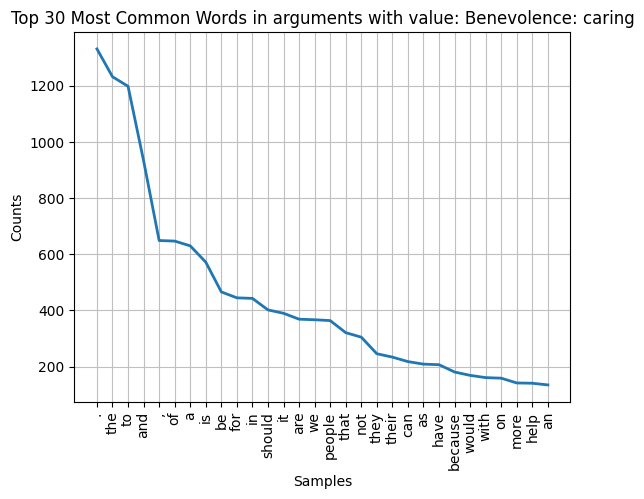

<Axes: title={'center': 'Top 30 Most Common Words in arguments with value: Benevolence: caring'}, xlabel='Samples', ylabel='Counts'>

In [21]:
label2freq["Benevolence: caring"].plot(30, title='Top 30 Most Common Words in arguments with value: Benevolence: caring')

**DATA CLEANING** 

*Now we look at the Freq Dist without stopwords or punctuation*

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words = set(stopwords.words('english'))

In [24]:
def filter_tokens(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return filtered_tokens

In [25]:
training_data["no_stopwords_premise"]=training_data["tokenized_premise"].apply(filter_tokens)
# training_data

In [26]:
no_sw_label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.no_stopwords_premise)
    no_sw_label2freq[label] = get_freq_dist(text)

# no_sw_label2freq

In [27]:
no_sw_label2freq["Tradition"].most_common(30)

[('people', 126),
 ('religion', 88),
 ('right', 87),
 ('school', 60),
 ('prayer', 54),
 ('many', 48),
 ("n't", 47),
 ('would', 47),
 ('want', 44),
 ('freedom', 42),
 ('language', 41),
 ('church', 38),
 ("'s", 35),
 ('must', 35),
 ('countries', 34),
 ('ban', 34),
 ('country', 33),
 ('human', 32),
 ('need', 32),
 ('sex', 32),
 ('atheism', 31),
 ('work', 31),
 ('scientology', 31),
 ('eu', 30),
 ('adopt', 29),
 ('one', 29),
 ('way', 28),
 ('believe', 28),
 ('values', 27),
 ('europe', 27)]

In [28]:
for label in labels_col:
    words = [w for (w, f) in no_sw_label2freq[label].most_common(20)]
    print(f"The 10 most frequent words for the label {label} are: \t {words}\n")

The 10 most frequent words for the label Self-direction: thought are: 	 ['people', 'right', 'religion', 'would', 'school', 'freedom', 'rights', 'want', "n't", 'research', 'church', 'many', 'children', 'property', 'could', 'intellectual', 'prayer', 'human', 'need', 'wikipedia']

The 10 most frequent words for the label Self-direction: action are: 	 ['people', 'right', 'would', 'want', "n't", 'freedom', "'s", 'need', 'school', 'eu', 'religion', 'way', 'able', 'many', 'government', 'free', 'ban', 'surgery', 'allowed', 'choose']

The 10 most frequent words for the label Stimulation are: 	 ['people', 'would', 'world', 'children', 'human', 'need', 'child', 'want', 'make', 'allow', 'many', 'games', 'ban', 'way', 'help', 'countries', 'space', 'actors', 'olympic', 'use']

The 10 most frequent words for the label Hedonism are: 	 ['people', 'many', 'cannabis', 'surgery', 'food', 'would', 'children', 'cosmetic', 'child', 'fast', 'ban', 'time', "n't", 'actors', 'right', 'want', 'allow', "'s", 'help

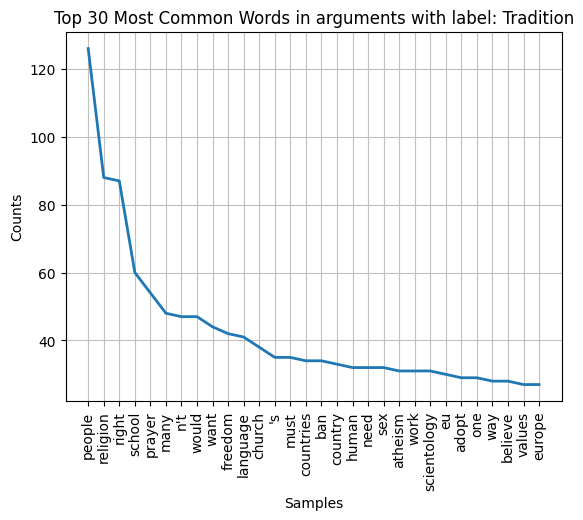

<Axes: title={'center': 'Top 30 Most Common Words in arguments with label: Tradition'}, xlabel='Samples', ylabel='Counts'>

In [29]:
label = "Tradition"
no_sw_label2freq[label].plot(30, title=f'Top 30 Most Common Words in arguments with label: {label}')

**TEXT ANNOTATION**

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
def get_pos_tag(text):
    pos_list = []
    for token, pos in nltk.pos_tag(text):
        pos_list.append(pos)
    return pos_list

In [32]:
training_data["POS"]=training_data["tokenized_premise"].apply(get_pos_tag)

In [33]:
training_data["POS"]

0       [PRP, MD, VB, JJ, NN, IN, PRP, MD, RB, VB, JJ,...
1       [RB, NN, MD, VB, VBN, IN, PRP, VBZ, RB, JJ, IN...
2       [RB, JJ, NNS, VBP, DT, JJ, NN, WDT, MD, VB, DT...
3       [NN, NN, VBZ, RB, DT, JJ, NN, TO, VB, NNS, IN,...
4       [NN, NN, VBZ, IN, DT, NN, IN, JJ, NN, ,, WDT, ...
                              ...                        
5387    [IN, DT, CD, NN, ,, PRP, VBP, VBN, VBG, NN, NN...
5388    [DT, NNS, VBD, RB, VBN, TO, VB, DT, NN, IN, NN...
5389    [DT, NNS, VBP, RB, IN, JJ, NNS, ,, WDT, VBP, R...
5390    [NNS, RB, VBP, NNS, IN, JJ, NNS, JJ, ,, VBG, J...
5391    [DT, NN, MD, RB, RB, JJ, IN, NN, CC, NN, ., NN...
Name: POS, Length: 5392, dtype: object

In [34]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
def get_lemma(text):
    lemmas = []
    for token in text:
        lemmas.append(lemmatizer.lemmatize(token))
    return lemmas

In [36]:
training_data["LEMMA"] = training_data["tokenized_premise"].apply(get_lemma)

In [37]:
training_data["LEMMA"]

0       [we, should, ban, human, cloning, a, it, will,...
1       [fast, food, should, be, banned, because, it, ...
2       [sometimes, economic, sanction, are, the, only...
3       [capital, punishment, is, sometimes, the, only...
4       [factory, farming, allows, for, the, productio...
                              ...                        
5387    [on, the, one, hand, ,, we, have, russia, kill...
5388    [the, subsidy, were, originally, intended, to,...
5389    [these, product, come, mainly, from, large, en...
5390    [subsidy, often, make, farmer, in, recipient, ...
5391    [the, eu, can, not, endlessly, lean, on, ameri...
Name: LEMMA, Length: 5392, dtype: object

**COLLOCATIONS**


In [38]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()


In [39]:

def get_n_collocations(n, label, grams):
    try:
        if grams != (2 or 3):
         raise ValueError("the parameter 'grams' must have a value of 2 or 3")

    except TypeError as e: 
        print(e)

    else:
        text = []

        for i, row in training_data.iterrows():
            if label in row.labels:
                text.extend(row.no_stopwords_premise)

        print(f"The {n} {grams}grams with highest PMI for the label {label} are: \t")
        
        if grams == 2:
            b = BigramCollocationFinder.from_words(text)
            b.apply_freq_filter(10)
            best = b.nbest(bigram_measures.pmi, 10)
            print(best)

        if grams == 3:
            t = TrigramCollocationFinder.from_words(text)
            t.apply_freq_filter(10)
            best = t.nbest(trigram_measures.pmi, 10)
            print(best)
            

In [40]:
get_n_collocations(10, "Power: dominance", 2)

The 10 2grams with highest PMI for the label Power: dominance are: 	
[('austerity', 'regime'), ('judicial', 'activism'), ('capital', 'punishment'), ('member', 'states'), ('private', 'military'), ('economic', 'sanctions'), ('compulsory', 'voting'), ('nuclear', 'weapons'), ('military', 'companies'), ('multi-party', 'system')]


In [41]:
for label in labels_col:
    get_n_collocations(10, label=label, grams = 2)
    print("\n")

The 10 2grams with highest PMI for the label Self-direction: thought are: 	
[('cosmetic', 'surgery'), ('pride', 'parades'), ('compulsory', 'voting'), ('child', 'actors'), ('stem', 'cell'), ('embryonic', 'stem'), ('safe', 'spaces'), ('space', 'exploration'), ('multi-party', 'system'), ('missionary', 'work')]


The 10 2grams with highest PMI for the label Self-direction: action are: 	
[('algorithmic', 'trading'), ('autonomous', 'cars'), ('student', 'loans'), ('bear', 'arms'), ('intellectual', 'property'), ('pride', 'parades'), ('member', 'states'), ('compulsory', 'voting'), ('mandatory', 'retirement'), ('human', 'cloning')]


The 10 2grams with highest PMI for the label Stimulation are: 	
[('cosmetic', 'surgery'), ('space', 'exploration'), ('olympic', 'games'), ('child', 'actors')]


The 10 2grams with highest PMI for the label Hedonism are: 	
[('child', 'actors'), ('cosmetic', 'surgery'), ('fast', 'food'), ('many', 'people')]


The 10 2grams with highest PMI for the label Achievement ar

**TOPIC MODELING WITH GENSIM**

In [54]:
# we first see the distribution of the frequencies of the words in the premises to see if we can improve the stop_words list
premises = []
for doc in training_data["no_stopwords_premise"]:
    for token in doc:
        premises.append(token)

premises_freq = get_freq_dist(premises)
premises_freq.most_common(20)

[('people', 1230),
 ('would', 573),
 ("n't", 390),
 ('need', 385),
 ('many', 344),
 ('right', 318),
 ("'s", 295),
 ('eu', 287),
 ('make', 253),
 ('help', 249),
 ('countries', 248),
 ('could', 248),
 ('way', 232),
 ('human', 226),
 ('work', 221),
 ('ban', 220),
 ('school', 215),
 ('children', 210),
 ('money', 202),
 ('country', 199)]

In [104]:
# we selected from the most frequent words those that seemed to too frequent (people) or less informative (would, n't, many and 's)
most_freq_words = ["people", "would", "'n't", "many", "'s"]
custom_stop_words = list(stop_words)
custom_stop_words.append("people")
custom_stop_words = set(custom_stop_words)


In [105]:
# creating the documents from the dataset's premises with no stop_words
docs = [[token for token in doc if token not in custom_stop_words] for doc in training_data["no_stopwords_premise"]]
# lemmatizing the docs
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
# remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]
# remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]


In [106]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token
            )

In [107]:
from gensim.corpora import Dictionary

In [108]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

print("Dictionary lenght 1):", len(dictionary))

# Filter out words that occur less than 5 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)


print("Dictionary lenght 2):",len(dictionary))

Dictionary lenght 1): 6975
Dictionary lenght 2): 1937


In [109]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [110]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1937
Number of documents: 5392


In [111]:
from gensim.models import HdpModel

In [112]:
# We first try with Hierarchical Dirichlet Process to see what would be the optimal number of topics
temp = dictionary[0] 
id2word = dictionary.id2token

hdp = HdpModel(
    corpus=corpus,
    id2word=id2word
)


In [113]:
hdp.print_topics(num_words=10)

[(0,
  '0.004*pas + 0.004*veto + 0.003*cell_research + 0.003*commit + 0.003*happening + 0.003*happened + 0.003*adult + 0.003*subsidize + 0.003*accordingly + 0.002*esteem'),
 (1,
  '0.004*decent + 0.004*manage + 0.003*anyway + 0.003*whale + 0.003*minority + 0.003*bad + 0.003*get + 0.003*sentence + 0.003*oppression + 0.002*dress'),
 (2,
  '0.004*child_actor + 0.003*embassy + 0.003*rampant + 0.003*forward + 0.003*moving + 0.003*area + 0.003*serf + 0.003*multicultural + 0.003*without + 0.003*movie'),
 (3,
  '0.003*costly + 0.003*must + 0.003*internal + 0.003*afford + 0.003*feed + 0.003*pupil + 0.003*start + 0.003*aging + 0.002*affordable + 0.002*energy'),
 (4,
  '0.003*problem + 0.003*power + 0.003*nato + 0.003*use + 0.003*pushing + 0.003*chose + 0.003*exploitation + 0.003*paper + 0.003*said + 0.003*barrier'),
 (5,
  '0.005*receive + 0.004*accurate + 0.003*space_exploration + 0.003*stress + 0.003*minimum + 0.003*desire + 0.003*check + 0.002*telemarketing + 0.002*appearance + 0.002*emotiona

In [119]:
# since the topics don't seem to make much sense we try with a crossvalidation on the LDA model for different values of num_topics
# Train LDA model.
from gensim.models import LdaModel

params = [2, 3, 4, 5, 9, 11, 13, 15, 17, 21, 25, 29]

for param in params:
    # Set training parameters.
    num_topics = param
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    # Make an index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
        random_state=42
    )

    top_topics = model.top_topics(corpus)

    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    print(f'For {param} num_topics average topic coherence: {avg_topic_coherence}.' )


For 2 num_topics average topic coherence: -4.901467105114546.
For 3 num_topics average topic coherence: -5.628314409149119.
For 4 num_topics average topic coherence: -7.528667355094751.
For 5 num_topics average topic coherence: -8.813255173832253.
For 9 num_topics average topic coherence: -10.023319721521323.
For 11 num_topics average topic coherence: -10.023085462294166.
For 13 num_topics average topic coherence: -9.768013383817115.
For 15 num_topics average topic coherence: -8.6854190455966.
For 17 num_topics average topic coherence: -9.22790228045515.
For 21 num_topics average topic coherence: -9.563856891849946.
For 25 num_topics average topic coherence: -10.082736070947044.
For 29 num_topics average topic coherence: -10.012876368178992.


In [120]:
# since we prefer higher numbers of topics (we are trying to model the different arguments that are discussed) we selected 15, as there
# is a spike in the coherence
num_topics = 15
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=4
)

top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

for topic in top_topics:
    print()
    print (topic[1], [w[1] for w in topic[0]])

Average topic coherence: -8.6854.

-5.982169010635303 ['religion', 'church', 'freedom', 'would', 'change', 'atheism', 'scientology', 'immigration', 'want', 'practice', 'world', 'church_scientology', 'religious', 'wrong', 'right', 'belief', 'one', 'way', 'everyone', 'year']

-6.256464545359038 ['space', 'safe', 'money', 'safe_space', 'exploration', 'space_exploration', 'much', 'health', 'time', 'place', 'new', 'technology', 'help', 'employee', 'telemarketing', 'thing', 'learn', 'benefit', 'need', 'many']

-6.570794010837696 ['system', 'student', 'policy', 'political', "n't", 'would', 'education', 'right', 'party', 'voting', 'want', 'choose', 'vote', 'loan', 'choice', 'need', 'free', 'get', 'student_loan', "ca_n't"]

-6.572610107682128 ['food', 'world', 'need', 'fast', 'fast_food', 'culture', 'country', 'good', 'job', 'provides', 'etc', 'ban', 'living', 'become', 'organization', 'available', 'part', 'term', 'many', 'high']

-7.5264260997697345 ['work', 'europe', 'country', 'value', 'miss

**TOPIC MODELING WITH SKLEARN**

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
x_train = [text for text in training_data["Premise"]]

In [131]:
# vectorizing with sklearn
# we turn the stop_words set into a list because parameters restriztions of CountVectorizer
custom_stop_words = list(custom_stop_words)
vectorizer = CountVectorizer(stop_words=custom_stop_words, max_df=0.5, min_df=5,max_features = 7000, ngram_range=(1,2))
tf = vectorizer.fit_transform(x_train)

In [133]:
from sklearn.decomposition import LatentDirichletAllocation

In [172]:
lda = LatentDirichletAllocation(n_components=15, max_iter=20,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=0, random_state=42)
lda.fit(tf)

LatentDirichletAllocation(max_iter=20, n_components=15, n_jobs=-1,
                          random_state=42)

In [173]:
def print_top_words(lda, feature_names, n_top_words):
    for topic_idx, topic in enumerate(lda.components_):
        print()
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [174]:
n_top_words = 20
tf_feature_names = vectorizer.get_feature_names_out() 
print_top_words(lda, tf_feature_names, n_top_words)


Topic 0: rights, three, laws, property, strikes, intellectual, three strikes, intellectual property, property rights, law, austerity, parties, strikes laws, abolish, regime, crime, austerity regime, ideas, therefore, political

Topic 1: eu, european, must, europe, executive, compensation, rights, executive compensation, union, migration, countries, policy, term, european union, social, long, within, human, every, values

Topic 2: safe, nuclear, weapons, nuclear weapons, spaces, killing, safe spaces, targeted, judicial, targeted killing, activism, judicial activism, space, money, place, necessary, uniform, could, used, war

Topic 3: work, children, whaling, ban, missionary, missionary work, space, need, school, telemarketing, many, prayer, important, space exploration, exploration, would, make, also, school prayer, part

Topic 4: right, keep, retirement, mandatory, mandatory retirement, arms, bear, bear arms, keep bear, provides, right keep, age, able, jobs, punishment, crime, someone,

In [182]:
import pyLDAvis
import pyLDAvis.lda_model

In [183]:
pyLDAvis.enable_notebook()

In [184]:
pyLDAvis.lda_model.prepare(lda,tf,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.081339 -0.179508       1        1  8.358121
2     -0.110707 -0.026355       2        1  7.288150
3     -0.062819 -0.012304       3        1  7.214025
5     -0.078924 -0.010501       4        1  6.973101
6      0.196074  0.062848       5        1  6.957629
7     -0.077419  0.124551       6        1  6.951380
10    -0.162542 -0.018507       7        1  6.865079
9     -0.065716 -0.197408       8        1  6.837647
4      0.046286  0.171575       9        1  6.524444
12     0.173518  0.060463      10        1  6.395642
11    -0.045049  0.046634      11        1  6.358316
0     -0.021844  0.068733      12        1  6.110966
8      0.015610  0.033895      13        1  5.754485
14     0.150676 -0.151807      14        1  5.718403
13    -0.038482  0.027691      15        1  5.692612, topic_info=          Term        Freq       Total Category  logprob  loglift
759         eu  290.000000  290.000000  Default  30.0000  30.0000
2252   surgery  170.000000  170.000000  Default  29.0000  29.0000
1104     human  217.000000  217.000000  Default  28.0000  28.0000
1964     right  307.000000  307.000000  Default  27.0000  27.0000
493   cosmetic  149.000000  149.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
116   allowing   16.623379   39.248626  Topic15  -5.3088   2.0069
1822   provide   20.379582  109.097826  Topic15  -5.1051   1.1883
1404      many   22.384252  330.317807  Topic15  -5.0113   0.1743
1669       pay   17.741850   75.940770  Topic15  -5.2437   1.4120
2128   society   17.240025  177.078315  Topic15  -5.2724   0.5366

[880 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
7         1  0.041736            able
7         2  0.035774            able
7         3  0.053661            able
7         5  0.047699            able
7         6  0.065586            able
...     ...       ...             ...
2597     11  0.816441           youth
2597     14  0.148444           youth
2598      4  0.986036            zero
2599      4  0.993974  zero tolerance
2601     13  0.990147            zoos

[1964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 6, 7, 8, 11, 10, 5, 13, 12, 1, 9, 15, 14])